In [1]:
include("Tools.jl");
include("GaugeFixing.jl")
include("KrylovTechnical.jl")
using DataFrames, CSV

In [3]:
gilt_pars = Dict(
    "gilt_eps" => 4e-6,
    "cg_chis" => collect(1:30),
    "cg_eps" => 1e-10,
    "verbosity" => 0,
    "rotate" => false
)

gilt_pars_r = Dict(
    "gilt_eps" => 4e-6,
    "cg_chis" => collect(1:30),
    "cg_eps" => 1e-10,
    "verbosity" => 0,
    "rotate" => true
)


Dict{String, Any} with 5 entries:
  "gilt_eps"  => 4.0e-6
  "rotate"    => true
  "cg_eps"    => 1.0e-10
  "verbosity" => 0
  "cg_chis"   => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  21, 22, 23, 24, 25, 26, 27,…

## Critical temperature with and without rotation (10 digits ):

Note that for this cell to work "critical_temperature.jl" should be run in advance with the corresponding parameters.

In [4]:
id = gilt_pars_identifier(gilt_pars)
id_r = gilt_pars_identifier(gilt_pars_r)

crit_pars = deserialize("critical_temperatures/" * id * "__tol=1.0e-10.data")
crit_pars_r = deserialize("critical_temperatures/" * id_r * "__tol=1.0e-10.data")

println("             ", "relT lower bound   |  relT higher bound  | trajectory length")
println("no rotation  ", crit_pars[1], "  |  ", crit_pars[2], "  |    ", crit_pars[3])
println("   rotation  ", crit_pars_r[1], " |  ", crit_pars_r[2], " |    ", crit_pars_r[3])

             relT lower bound   |  relT higher bound  | trajectory length
no rotation  1.0000096365064381  |  1.000009636580944  |    36
   rotation  1.0000092475116256 |  1.0000092475861315 |    38


## Corresponding trajectories.
### No rotation

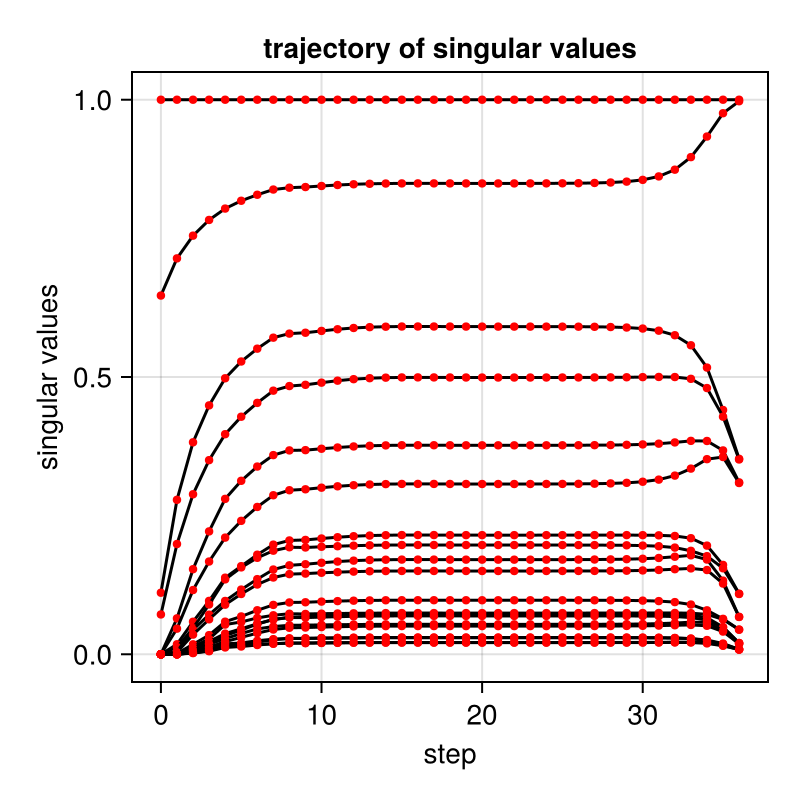

In [5]:
relT = (crit_pars[1] + crit_pars[2]) / 2
plot_the_trajectory(relT, gilt_pars; traj_len=crit_pars[3])

### Rotation

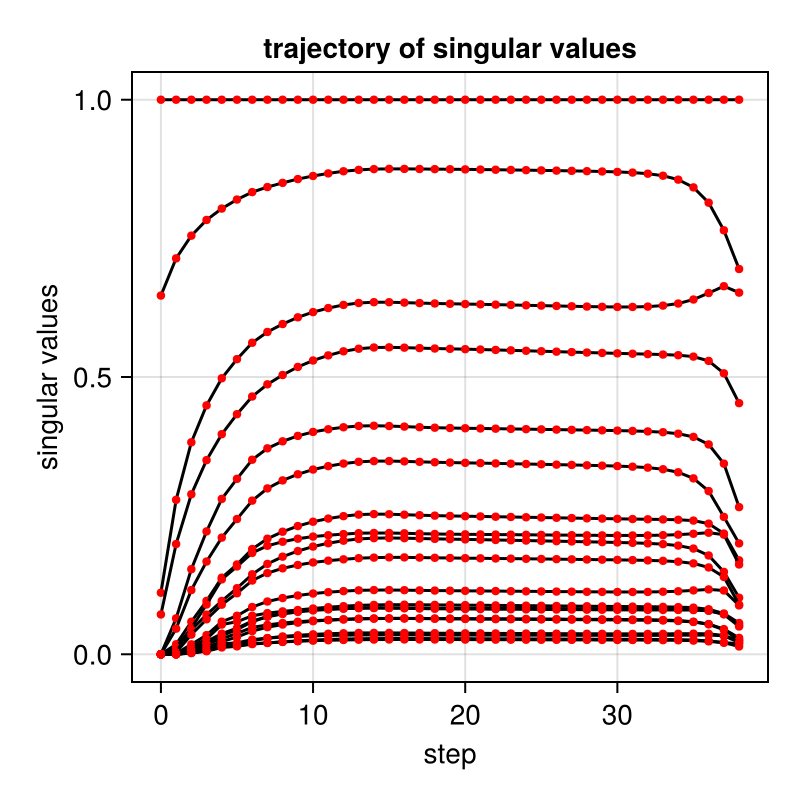

In [6]:
relT = (crit_pars_r[1] + crit_pars_r[2]) / 2
plot_the_trajectory(relT, gilt_pars_r; traj_len=crit_pars_r[3])

# Spectrum of the jacobian at the approximate fixed point (no rotation)

Note that "eigensystem.jl" should be run in advance with the corresponding parameters. 

In [9]:
id_no_rotation_tt = "eigensystems/" * gilt_pars_identifier(gilt_pars) * "__Z2_odd_sector=true_freeze_R=true_eigensystem.data"
id_no_rotation_tf = "eigensystems/" * gilt_pars_identifier(gilt_pars) * "__Z2_odd_sector=true_freeze_R=false_eigensystem.data"
id_no_rotation_ft = "eigensystems/" * gilt_pars_identifier(gilt_pars) * "__Z2_odd_sector=false_freeze_R=true_eigensystem.data"
id_no_rotation_ff = "eigensystems/" * gilt_pars_identifier(gilt_pars) * "__Z2_odd_sector=false_freeze_R=false_eigensystem.data"


spectrum_Z2T_FT = deserialize(id_no_rotation_tt)["eigensystem"][1]
spectrum_Z2T_FF = deserialize(id_no_rotation_tf)["eigensystem"][1]
spectrum_Z2F_FT = deserialize(id_no_rotation_ft)["eigensystem"][1]
spectrum_Z2F_FF = deserialize(id_no_rotation_ff)["eigensystem"][1];

specs = DataFrame()
specs[:, "Z2 odd sector included; R freezing: true"] = spectrum_Z2T_FT[1:30]
specs[:, "Z2 odd sector included; R freezing: false"] = spectrum_Z2T_FF[1:30]
specs[:, "Z2 odd sector excluded; R freezing: true"] = spectrum_Z2F_FT[1:30]
specs[:, "Z2 odd sector excluded; R freezing: false"] = spectrum_Z2F_FF[1:30]
specs[:, "Z2 odd sector included; Ising CFT prediction"] = 2 .^ (2 .- exact_spectrum(31)[2:end])
specs[:, "Z2 odd sector excluded; Ising CFT prediction"] = 2 .^ (2 .- exact_spectrum_even(31)[2:end])

CSV.write("spectrums_chi=30.csv", specs)
specs

Row,Z2 odd sector included; R freezing: true,Z2 odd sector included; R freezing: false,Z2 odd sector excluded; R freezing: true,Z2 odd sector excluded; R freezing: false,Z2 odd sector included; Ising CFT prediction,Z2 odd sector excluded; Ising CFT prediction
,Complex…,Complex…,Complex…,Complex…,Float64,Float64
1,4.62923+0.0im,3.66829+0.0im,2.00875+0.0im,1.99954+0.0im,3.66802,2.0
2,4.018+0.0im,1.99954+0.0im,1.00101+0.0im,1.00298+0.0im,2.0,1.0
3,2.00875+0.0im,1.52804+0.000980452im,0.999061+0.0im,0.997656+0.0im,1.83401,1.0
4,1.55406+0.0im,1.52804-0.000980452im,0.805143+0.0412055im,0.652565+0.0im,1.83401,1.0
5,1.49718+0.0im,1.00298+0.0im,0.805143-0.0412055im,0.586461+0.0392682im,1.0,1.0
6,-1.24916+0.0im,0.997656+0.0im,0.66254+0.0im,0.586461-0.0392682im,1.0,0.5
7,1.08731+0.0im,0.881314+0.0im,0.55767+0.0im,0.43864+0.159239im,1.0,0.5
8,1.00101+0.0im,0.652539+0.0im,0.525123+0.0484755im,0.43864-0.159239im,1.0,0.5
9,0.999061+0.0im,0.586795+0.0401922im,0.525123-0.0484755im,0.404466+0.0im,0.917004,0.5
